
--- Random Forest Regression Results ---
Mean Squared Error: 0.1519
R² Score: 0.6315


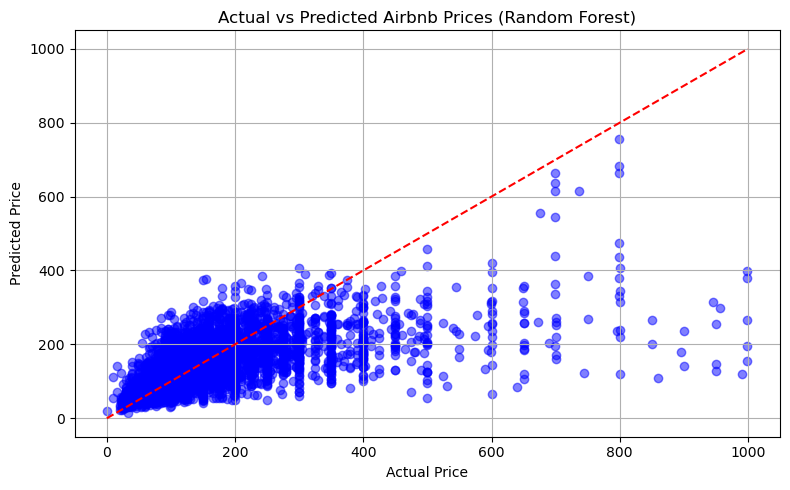

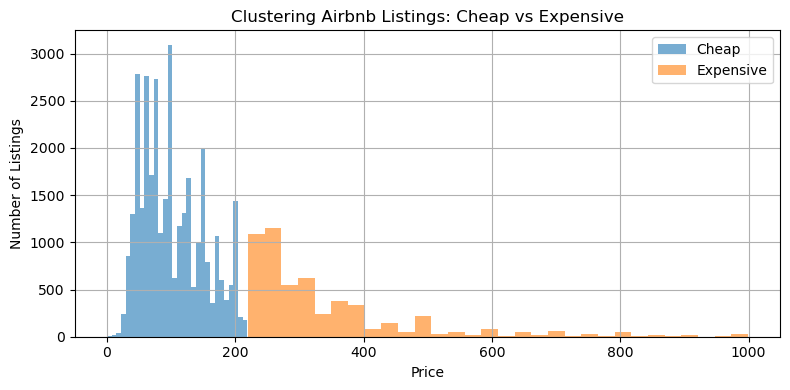

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# 1. Load and clean data
df = pd.read_csv('AB_NYC_2019.csv')
df = df[df['price'] < 1000]  # Remove outliers
df = df.dropna(subset=['reviews_per_month'])  # Drop rows with missing review data

# 2. Select relevant features
features = ['room_type', 'neighbourhood_group', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month',
            'availability_365', 'latitude', 'longitude']
df = df[features + ['price']]

# 3. One-hot encode categorical columns
X = pd.get_dummies(df[features], drop_first=True)
y = np.log1p(df['price'])  # log(price + 1) for stability

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 7. Predict
pred = model.predict(X_test_scaled)

# 8. Evaluate
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("\n--- Random Forest Regression Results ---")
print("Mean Squared Error:", round(mse, 4))
print("R² Score:", round(r2, 4))

# 9. Plot: Actual vs Predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(np.expm1(y_test), np.expm1(pred), color='blue', alpha=0.5)
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Airbnb Prices (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Clustering (Cheap vs Expensive)
df_cluster = df[['price']].copy()
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[['price']])

# Make cluster 0 = cheap, 1 = expensive (based on mean)
if df_cluster.groupby('cluster')['price'].mean()[0] > df_cluster.groupby('cluster')['price'].mean()[1]:
    df_cluster['cluster'] = df_cluster['cluster'].map({0: 1, 1: 0})

# Plot cluster histogram
plt.figure(figsize=(8, 4))
plt.hist(df_cluster[df_cluster['cluster'] == 0]['price'], bins=30, alpha=0.6, label='Cheap')
plt.hist(df_cluster[df_cluster['cluster'] == 1]['price'], bins=30, alpha=0.6, label='Expensive')
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.title("Clustering Airbnb Listings: Cheap vs Expensive")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
